# <font color='blue'>Chapter 15. Digital Signal Processing</font>

## <font color='blue'>Problem</font>

#### 單一頻率與倍數頻率聲音的聽感差異？
https://www.youtube.com/watch?v=BtNIKy3cWbM
#### 為什麼新的音響喇叭會吵到鄰居？
http://aitanvh.blogspot.com/2017/08/blog-post_7.html
#### 人們唱歌的聲音，有甚麼樣的頻譜特徵呢？
https://aitanvh.blogspot.com/2019/12/blog-post.html

### <font color='green'>Next: Filter Design</font>

## <font color='blue'>Introduction to DSP</font>

### Digital Signal Processing in Frequency Domain (頻率域的數位訊號處理)
Processing Steps:
1. Input signal $x[n]$ and transform it to frequency domain by DTFT. That is
\begin{equation}
X(e^{j\omega}) =F\{x[n]\}
\end{equation}
In digial signal processing, the DTFT is
\begin{equation}
X[k] = \sum_{n=0}^{N-1} x[n] e^{-j 2 \pi kn/N}, k=0, 1,..., N-1
\end{equation}

2. According to the object or specification of the system input and output, a filter is desgined to generate extected frequency response.
That is
\begin{equation}
H(e^{j\omega}) = F\{h[n]\}
\end{equation}
where the amplitude of the frequency response is between 0 and 1.

3. Apply the filter to the signal in frequency domain by convolution to derive the fequency response.
\begin{equation}
Y(e^{j\omega}) = H(e^{j\omega})X(e^{j\omega})
\end{equation}
In DSP, 
\begin{equation}
Y[k] = H[k] \cdot X[k]
\end{equation}

4. Derive the ouptut signal by applying inverse DTFT.
\begin{equation}
y[n] = F^{-1}\{ Y(e^{j \omega})\}
\end{equation}
In DSP, 
\begin{equation}
y[n] = \frac{1}{N}\sum_{k=0}^{N-1} Y[k] e^{j 2 \pi kn/N}, n=0, 1,..., N-1
\end{equation}

<div>
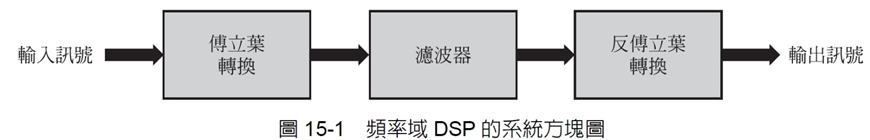
</div>

## <font color='blue'>Ideal Filter</font>

Example: <br>
If there is a signal is defined as follows. <br>
$x(t)=\cos (2\pi \cdot (10) \cdot t)+\cos (2\pi \cdot (20) \cdot t) + \cos (2\pi \cdot (30) \cdot t)$ <br>

<div>
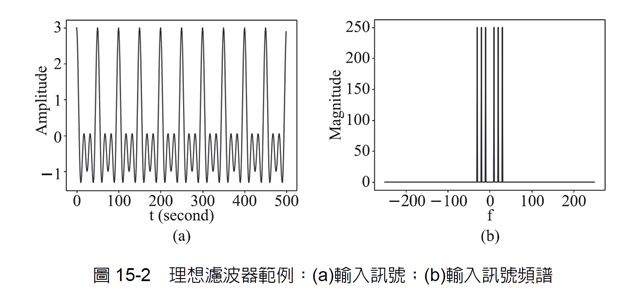
</div>

Try to find the outputs of applying the following filters when the sampling rate is 500 Hz. <br>
1.Ideal lowpass filter with the cutoff frequency $f_c = 15$ Hz.<br>
2.Ideal highpass filter with the cutoff frequency $f_c = 15$ Hz.<br>
3.Ideal bandpass filter with the cutoff frequencies are $f_1=15$ Hz and $f_2=25$ Hz.<br>
4.Ideal bandstop filter with the cutoff frequencies are $f_1=15$ Hz and $f_2=25$ Hz.<br>

1. 若套用理想低通濾波器，則輸出訊號與頻譜，如圖15-3。<br>
理想低通濾波器使得訊號低於15 Hz的訊號通過，並抑制15Hz以上的訊號，由圖上可以清楚觀察到，輸出訊號僅包含10Hz的頻率分量。

<div>
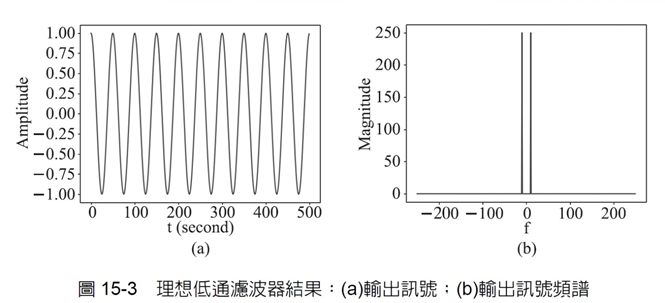
</div>

2. 若套用理想高通濾波器，則輸出訊號與頻譜，如圖15-4。<br>
理想高通濾波器使得訊號高於15Hz的訊號通過，並抑制15Hz以下的訊號，由圖上可以清楚觀察到，輸出訊號僅包含20Hz與30 Hz的頻率分量。

<div>
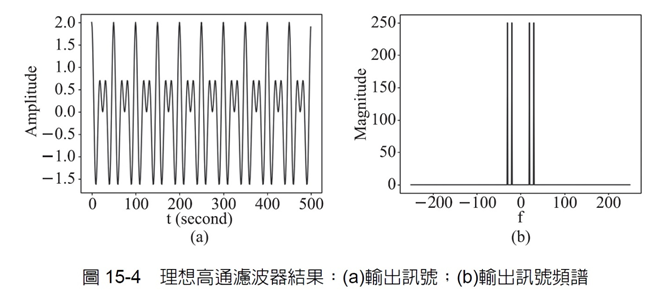
</div>

3. 若套用理想帶通濾波器，則輸出訊號與頻譜，如圖15-5。<br>
理想帶通濾波器允許訊號介於$f_1 - f_2$之間的訊號通過，由圖上可以清楚觀察到，輸出訊號僅包含20Hz的頻率分量。

<div>
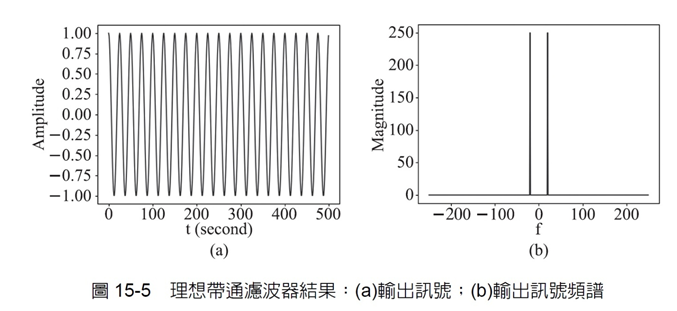
</div>

4. 若套用理想帶阻濾波器，則輸出訊號與頻譜，如圖15-6。<br>
理想帶通濾波器允許訊號介於$f_1 - f_2$之間的訊號制止，由圖上可以清楚觀察到，輸出訊號包含10Hz與30Hz的頻率分量。

<div>
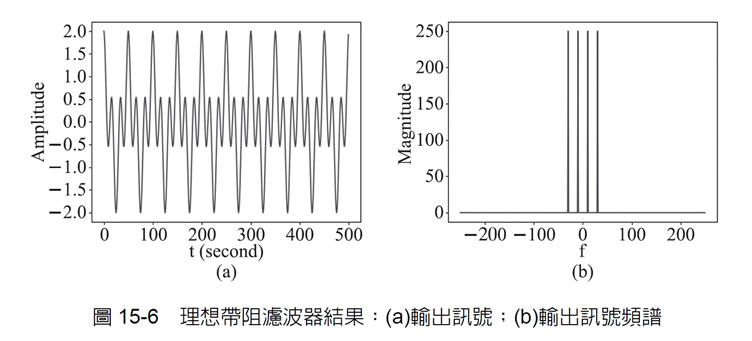
</div>

In [1]:
import numpy as np
from numpy.fft import fft, fftshift, ifft, fftfreq
import matplotlib.pyplot as plt

def ideal_lowpass_filtering( x, cutoff, fs ):
	X = fft( x )
	H = np.zeros( fs )
	for i in range( -cutoff, cutoff + 1 ):
		H[i] = 1	
	Y = H * X
	y = ifft( Y )
	y = y.real
	return y

def ideal_highpass_filtering( x, cutoff, fs ):
	X = fft( x )
	H = np.zeros( fs )
	for i in range( -cutoff, cutoff + 1 ):
		H[i] = 1	
	H = 1 - H
	Y = H * X
	y = ifft( Y )
	y = y.real
	return y

def ideal_bandpass_filtering( x, f1, f2, fs ):
	X = fft( x )
	H = np.zeros( fs )
	for i in range( f1, f2 + 1 ):
		H[i] = 1	
	for i in range( -f1, -f2 - 1, -1 ):
		H[i] = 1
	Y = H * X
	y = ifft( Y )
	y = y.real
	return y

def ideal_bandstop_filtering( x, f1, f2, fs ):
	X = fft( x )
	H = np.zeros( fs )
	for i in range( f1, f2 + 1 ):
		H[i] = 1	
	for i in range( -f1, -f2 - 1, -1 ):
		H[i] = 1
	H = 1 - H
	Y = H * X
	y = ifft( Y )
	y = y.real
	return y	

def ideal_allpass_filtering( x ):
	X = fft( x )
	Y = X
	y = ifft( Y )
	y = y.real
	return y	
	
def main( ):
	print( "DSP in Frequency Domain" )
	print( "(1) Ideal Lowpass Filtering" )
	print( "(2) Ideal Highpass Filtering" )
	print( "(3) Ideal Bandpass Filtering" )
	print( "(4) Ideal Bandstop Filtering" )
	print( "(5) Ideal Allpass Filtering" )
	
	choice = eval( input( "Please enter your choice: " ) )

	if choice == 1 or choice == 2:
		fc = eval( input( "Please enter cutoff frequency(Hz): " ) )
		
	if choice == 3 or choice == 4:
		f1 = eval( input( "Please enter frequency f1(Hz): " ) )
		f2 = eval( input( "Please enter frequency f2(Hz): " ) )
	
	fs = 500
	t = np.linspace( 0, 1, fs, endpoint = False )
	x = np.cos( 2 * np.pi * 10 * t ) + np.cos( 2 * np.pi * 20 * t ) + np.cos( 2 * np.pi * 30 * t )

	if choice == 1:
		y = ideal_lowpass_filtering( x, fc, fs )
	elif choice == 2:
		y = ideal_highpass_filtering( x, fc, fs )
	elif choice == 3:
		y = ideal_bandpass_filtering( x, f1, f2, fs )
	elif choice == 4:
		y = ideal_bandstop_filtering( x, f1, f2, fs )
	else:
		y = ideal_allpass_filtering( x )
	
	f = fftshift( fftfreq( fs, 1 / fs ) )
	Xm = abs( fftshift( fft( x ) ) )
	Ym = abs( fftshift( fft( y ) ) )
	
	plt.figure( 1 )
	plt.plot( x )
	plt.xlabel( 't (second)' )
	plt.ylabel( 'Amplitude' )

	plt.figure( 2 )
	plt.plot( f, Xm )
	plt.xlabel( 'f' )
	plt.ylabel( 'Magnitude' )	

	plt.figure( 3 )
	plt.plot( y )
	plt.xlabel( 't (second)' )
	plt.ylabel( 'Amplitude' )	

	plt.figure( 4 )
	plt.plot( f, Ym )
	plt.xlabel( 'f' )
	plt.ylabel( 'Magnitude' )			
	
	plt.show( )
	
main( )

## <font color='blue'>Spectrum Shifting</font>
頻譜平移(Spectrum Shifting)是指將輸入訊號在頻率域中進行平移，進而產生輸出訊號的技術，也經常稱為頻率平移(Frequency Shifting)。

According to Second Shifting Theorey,
\begin{equation}
F\{f(t) \cdot e^{j\omega_0 t}\} = F(\omega - \omega_0)
\end{equation}
where $\omega_0$ is the shift frequency with $\omega_0 > 0$

Example: <br>
If there is a signal is defined as follows. <br>
$x(t)=\cos (2\pi \cdot (10) \cdot t)$ <br>
Try to find the output of applying the spectrum shifting when the sampling rate is 500 Hz and the shift frequency is 20 Hz. <br>

輸入訊號為弦波，其波形圖與頻譜，如圖15-7。<br>
由圖上可以觀察到，輸入訊號包含的頻率分量為10 Hz。套用頻率平移技術，平移的頻率為20 Hz，則輸出訊號與頻譜，如圖15-8。<br>
由圖上可以觀察到，輸出訊號的頻率分量，在平移20 Hz後，變成30 Hz。

<div>
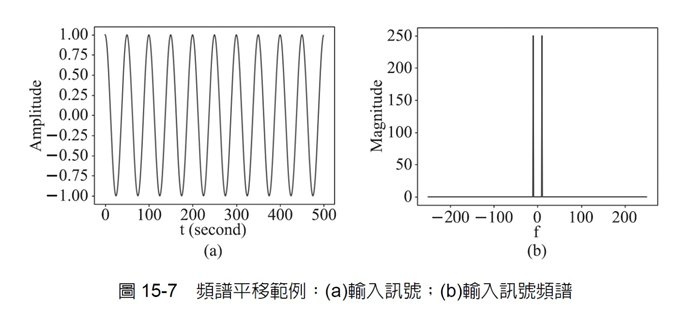
</div>
<div>
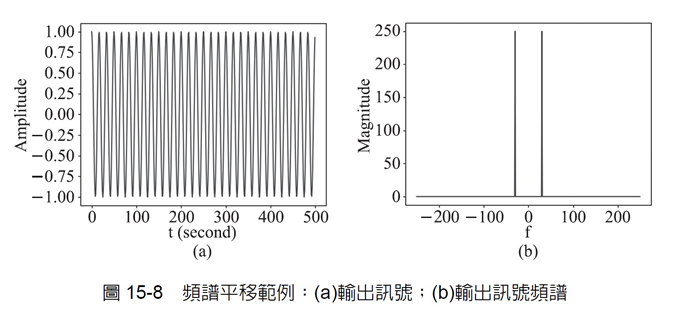
</div>

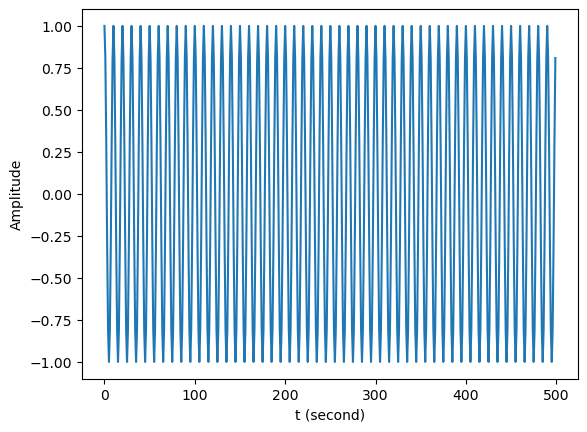

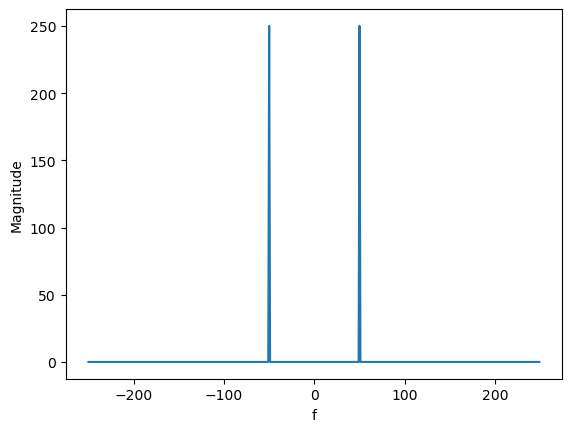

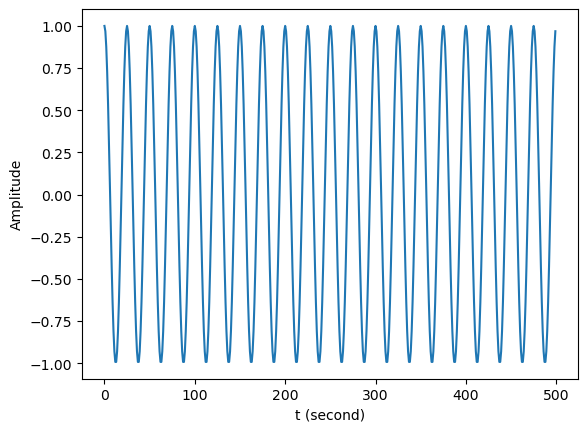

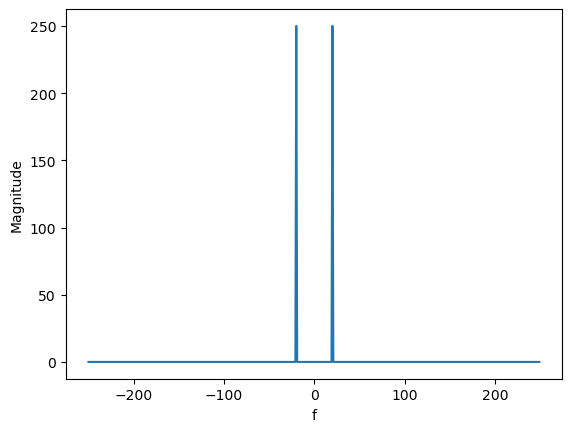

In [2]:
import numpy as np
from numpy.fft import fft, fftshift, ifft, fftfreq
import matplotlib.pyplot as plt

def spectrum_shifting( x, shift, fs ):
	X = fft( x )
	N = fs
	N_half = int( fs / 2 )
	Y = np.zeros( N, dtype = 'complex' )
	for i in range( N_half ):
		if i + shift >= 0 and i + shift <= N_half:
			Y[i + shift] = X[i]
	for i in range( N_half + 1, fs ):
		if i - shift >= N_half + 1 and i - shift < N:
			Y[i - shift] = X[i]
	y = ifft( Y )
	y = y.real
	return y
	
def main( ):
	fs = 500
	t = np.linspace( 0, 1, fs, endpoint = False )
	x = np.cos( 2 * np.pi * 50 * t )

	y = spectrum_shifting( x, -30, fs )
	
	f = fftshift( fftfreq( fs, 1 / fs ) )
	Xm = abs( fftshift( fft( x ) ) )
	Ym = abs( fftshift( fft( y ) ) )
	
	plt.figure( 1 )
	plt.plot( x )
	plt.xlabel( 't (second)' )
	plt.ylabel( 'Amplitude' )

	plt.figure( 2 )
	plt.plot( f, Xm )
	plt.xlabel( 'f' )
	plt.ylabel( 'Magnitude' )

	plt.figure( 3 )
	plt.plot( y )
	plt.xlabel( 't (second)' )
	plt.ylabel( 'Amplitude' )	

	plt.figure( 4 )
	plt.plot( f, Ym )
	plt.xlabel( 'f' )
	plt.ylabel( 'Magnitude' )		
	
	plt.show( )
	
main( )

## <font color='blue'>Signal Processing of Audio Files</font>


### <font color='green'>Ideal Filter</font>

In [ ]:
import numpy as np
import wave
from scipy.io.wavfile import read, write
import struct
from numpy.fft import fft, fftshift, ifft

def ideal_lowpass_filtering( x, cutoff, fs ):
	X = fft( x )
	H = np.zeros( fs )
	for i in range( -cutoff, cutoff + 1 ):
		H[i] = 1	
	Y = H * X
	y = ifft( Y )
	y = y.real
	return y

def ideal_highpass_filtering( x, cutoff, fs ):
	X = fft( x )
	H = np.zeros( fs )
	for i in range( -cutoff, cutoff + 1 ):
		H[i] = 1	
	H = 1 - H
	Y = H * X
	y = ifft( Y )
	y = y.real
	return y

def ideal_bandpass_filtering( x, f1, f2, fs ):
	X = fft( x )
	H = np.zeros( fs )
	for i in range( f1, f2 + 1 ):
		H[i] = 1	
	for i in range( -f1, -f2 - 1, -1 ):
		H[i] = 1
	Y = H * X
	y = ifft( Y )
	y = y.real
	return y

def ideal_bandstop_filtering( x, f1, f2, fs ):
	X = fft( x )
	H = np.zeros( fs )
	for i in range( f1, f2 + 1 ):
		H[i] = 1	
	for i in range( -f1, -f2 - 1, -1 ):
		H[i] = 1
	H = 1 - H
	Y = H * X
	y = ifft( Y )
	y = y.real
	return y	

def ideal_allpass_filtering( x ):
	X = fft( x )
	Y = X
	y = ifft( Y )
	y = y.real
	return y
	
def main( ):
	infile  = input( "Input File: " )	
	outfile = input( "Output File: " )
	
	wav = wave.open( infile, 'rb' )
	num_channels = wav.getnchannels( )	# 
	sampwidth	 = wav.getsampwidth( )	# 
	fs			 = wav.getframerate( )	# 
	num_frames	 = wav.getnframes( )	# 
	comptype	 = wav.getcomptype( )	# 
	compname	 = wav.getcompname( )	#
	wav.close( )

	sampling_rate, x = read( infile )	# 

	y = np.zeros( x.size )
	n = int( x.size / fs ) + 1
	N = fs
	for iter in range( n ):
		xx = np.zeros( N )
		yy = np.zeros( N )
		for i in range( iter * N, ( iter + 1 ) * N ):
			if i < x.size:
				xx[i - iter * N] = x[i]
		
		yy = ideal_lowpass_filtering( xx, 1800, fs )		
				
		for i in range( iter * N, ( iter + 1 ) * N ):
			if i < x.size:
				y[i] = yy[i - iter * N]
	
	wav_file = wave.open( outfile, 'w' )
	wav_file.setparams(( num_channels, sampwidth, fs, num_frames, comptype, compname )) 

	for s in y:
		wav_file.writeframes( struct.pack( 'h', int ( s ) ) )

	wav_file.close( ) 
	
main( )

### <font color='green'>Spectrum Shifting</font>

In [3]:
import numpy as np
import wave
from scipy.io.wavfile import read, write
import struct
from numpy.fft import fft, fftshift, ifft

def spectrum_shifting( x, shift, fs ):
	X = fft( x )
	N = fs
	N_half = int( fs / 2 )
	Y = np.zeros( N, dtype = 'complex' )
	for i in range( N_half ):
		if i + shift >= 0 and i + shift <= N_half:
			Y[i + shift] = X[i]
	for i in range( N_half + 1, fs ):
		if i - shift >= N_half + 1 and i - shift < N:
			Y[i - shift] = X[i]
	y = ifft( Y )
	y = y.real
	return y
	
def main( ):
	infile  = input( "Input File: " )	
	outfile = input( "Output File: " )
	
	wav = wave.open( infile, 'rb' )
	num_channels = wav.getnchannels( )	# 
	sampwidth	 = wav.getsampwidth( )	# 
	fs			 = wav.getframerate( )	# 
	num_frames	 = wav.getnframes( )	# 
	comptype	 = wav.getcomptype( )	# 
	compname	 = wav.getcompname( )	# 
	wav.close( )

	sampling_rate, x = read( infile )	# 

	y = np.zeros( x.size )
	n = int( x.size / fs ) + 1
	N = fs
	for iter in range( n ):
		xx = np.zeros( N )
		yy = np.zeros( N )
		for i in range( iter * N, ( iter + 1 ) * N ):
			if i < x.size:
				xx[i - iter * N] = x[i]
		
		yy = spectrum_shifting( xx, -1500, fs )		
				
		for i in range( iter * N, ( iter + 1 ) * N ):
			if i < x.size:
				y[i] = yy[i - iter * N]
	
	wav_file = wave.open( outfile, 'w' )
	wav_file.setparams(( num_channels, sampwidth, fs, num_frames, comptype, compname )) 

	for s in y:
		wav_file.writeframes( struct.pack( 'h', int ( s ) ) )

	wav_file.close( ) 
	
main( )

Input File: R2D2.WAV
Output File: R2D2-SS-1500.WAV


In [ ]:
## <font color='red'> Final Problem:</font>
### Reference